Before we get started, a couple of reminders to keep in mind when using iPython notebooks:

- Remember that you can see from the left side of a code cell when it was last run if there is a number within the brackets.
- When you start a new notebook session, make sure you run all of the cells up to the point where you last left off. Even if the output is still visible from when you ran the cells in your previous session, the kernel starts in a fresh state so you'll need to reload the data, etc. on a new session.
- The previous point is useful to keep in mind if your answers do not match what is expected in the lesson's quizzes. Try reloading the data and run all of the processing steps one by one in order to make sure that you are working with the same variables and data that are at each quiz stage.


## Load Data from CSVs

In [293]:
import unicodecsv

## Longer version of code (replaced with shorter, equivalent version below)

with open('enrollments.csv', 'rb') as f:
    reader = unicodecsv.DictReader(f)
    enrollments = list(reader)

enrollments[0]
   

{u'account_key': u'448',
 u'cancel_date': u'1/14/2015',
 u'days_to_cancel': u'65',
 u'is_canceled': u'TRUE',
 u'is_udacity': u'TRUE',
 u'join_date': u'11/10/2014',
 u'status': u'canceled'}

In [294]:
#####################################
#                 1                 #
#####################################

## Read in the data from daily_engagement.csv and project_submissions.csv 
## and store the results in the below variables.
## Then look at the first row of each table.
def read_csv(filename):
    with open(filename, 'rb') as x:
        reader = unicodecsv.DictReader(x)
        return list(reader)
    
enrollments = read_csv('enrollments.csv')
daily_engagement = read_csv('daily_engagement.csv')
project_submissions = read_csv('project_submissions.csv')

print enrollments[0]
print daily_engagement[0]
print project_submissions[0]

{u'status': u'canceled', u'is_udacity': u'TRUE', u'is_canceled': u'TRUE', u'join_date': u'11/10/2014', u'account_key': u'448', u'cancel_date': u'1/14/2015', u'days_to_cancel': u'65'}
{u'lessons_completed': u'0', u'num_courses_visited': u'1', u'total_minutes_visited': u'11.6793745', u'projects_completed': u'0', u'acct': u'0', u'utc_date': u'1/9/2015'}
{u'lesson_key': u'3176718735', u'processing_state': u'EVALUATED', u'account_key': u'256', u'assigned_rating': u'UNGRADED', u'completion_date': u'1/16/2015', u'creation_date': u'1/14/2015'}


In [386]:
#### USING PANDAS

import pandas as pd
daily_engagement = pd.read_csv('daily_engagement_full.csv')
len(daily_engagement['acct'].unique())

1237

## Fixing Data Types

In [295]:
from datetime import datetime as dt

# Takes a date as a string, and returns a Python datetime object. 
# If there is no date given, returns None
def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%m/%d/%Y')
    
# Takes a string which is either an empty string or represents an integer,
# and returns an int or None.
def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)

# Clean up the data types in the enrollments table
for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'TRUE'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'TRUE'
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    
enrollments[0]

{u'account_key': u'448',
 u'cancel_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'days_to_cancel': 65,
 u'is_canceled': True,
 u'is_udacity': True,
 u'join_date': datetime.datetime(2014, 11, 10, 0, 0),
 u'status': u'canceled'}

In [296]:
# Clean up the data types in the engagement table
for engagement_record in daily_engagement:
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])
    
daily_engagement[0]

{u'acct': u'0',
 u'lessons_completed': 0,
 u'num_courses_visited': 1,
 u'projects_completed': 0,
 u'total_minutes_visited': 11.6793745,
 u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}

In [297]:
# Clean up the data types in the submissions table
for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])

project_submissions[0]

{u'account_key': u'256',
 u'assigned_rating': u'UNGRADED',
 u'completion_date': datetime.datetime(2015, 1, 16, 0, 0),
 u'creation_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'lesson_key': u'3176718735',
 u'processing_state': u'EVALUATED'}

Note when running the above cells that we are actively changing the contents of our data variables. If you try to run these cells multiple times in the same session, an error will occur.

## Investigating the Data

In [298]:
for engagement_record in daily_engagement:
    engagement_record['account_key'] = engagement_record['acct']
    del [engagement_record['acct']]

print daily_engagement[0]['account_key']

0


In [299]:
def get_unique_students(data):
    unique_students = set()
    for data_point in data:
        unique_students.add(data_point['account_key'])
    return unique_students

In [300]:
#####################################
#                 2                 #
#####################################

### For each of these three tables, find the number of rows in the table and
### the number of unique students in the table. To find the number of unique
### students, you might want to create a set of the account keys in each table.

enrollment_num_rows = len(enrollments)    # Replace this with your code
print enrollment_num_rows
enrollment_num_unique_students = get_unique_students(enrollments)
print len(enrollment_num_unique_students)

engagement_num_rows = len(daily_engagement)             # Replace this with your code
print engagement_num_rows
engagement_num_unique_students = get_unique_students(daily_engagement)
print len(engagement_num_unique_students)

submission_num_rows = len(project_submissions)             # Replace this with your code
print submission_num_rows
submission_num_unique_students = get_unique_students(project_submissions)
print len(submission_num_unique_students)



1640
1302
136240
1237
3642
743


## Problems in the Data

In [301]:
#####################################
#                 3                 #
#####################################

## Rename the "acct" column in the daily_engagement table to "account_key".

## Missing Engagement Records

In [302]:
#####################################
#                 4                 #
#####################################

## Find any one student enrollments where the student is missing from the daily engagement table.
## Output that enrollment.

#### John's Solution (doesn't add all dictionary info on surprising data points) ####

enrollment_accounts = set(sorted(enrollment_num_unique_students))
engagement_accounts = set(sorted(engagement_num_unique_students))
submission_accounts = set(sorted(submission_num_unique_students))

#Comparing enrollment account_key to engagement account_key:
surprising_data = enrollment_accounts.difference(engagement_accounts)

print 'Number of enrolled students with no engagement: ' + str(len(surprising_data))
print surprising_data

Number of enrolled students with no engagement: 65
set([u'1304', u'1086', u'1186', u'875', u'1155', u'1222', u'884', u'1120', u'749', u'1148', u'981', u'766', u'1125', u'1213', u'750', u'870', u'996', u'1025', u'707', u'878', u'819', u'1191', u'1190', u'1145', u'733', u'799', u'871', u'717', u'654', u'727', u'737', u'739', u'914', u'1219', u'1291', u'1010', u'889', u'817', u'902', u'997', u'1237', u'1171', u'1270', u'1218', u'1273', u'1238', u'711', u'664', u'1069', u'1284', u'841', u'1044', u'1129', u'1063', u'1079', u'968', u'789', u'1241', u'964', u'725', u'728', u'1101', u'803', u'802', u'926'])


In [303]:
#####################################
#                 4                 #
#####################################

## Find any one student enrollments where the student is missing from the daily engagement table.
## Output that enrollment.

##### Professors Solution ####
surprising_students = []

for enrollment in enrollments:
    #student = enrollment['account_key']
    if enrollment['account_key'] not in engagement_num_unique_students:
        surprising_students.append(enrollment)
    
    
print surprising_students[5]
        

{u'status': u'canceled', u'is_udacity': False, u'is_canceled': True, u'join_date': datetime.datetime(2014, 12, 3, 0, 0), u'account_key': u'654', u'cancel_date': datetime.datetime(2014, 12, 3, 0, 0), u'days_to_cancel': 0}


## Checking for More Problem Records

In [304]:
#####################################
#                 5                 #
#####################################

## Find the number of surprising data points (enrollments missing from
## the engagement table) that remain, if any.

num_problem_students = 0
problem_students = []

for enrollment in enrollments:
    if enrollment['account_key'] not in engagement_num_unique_students \
    and enrollment['join_date'] != enrollment['cancel_date']:
        num_problem_students += 1
        problem_students.append(enrollment['account_key'])
        print enrollment
        
print num_problem_students
print problem_students

{u'status': u'canceled', u'is_udacity': True, u'is_canceled': True, u'join_date': datetime.datetime(2015, 1, 10, 0, 0), u'account_key': u'1304', u'cancel_date': datetime.datetime(2015, 3, 10, 0, 0), u'days_to_cancel': 59}
{u'status': u'canceled', u'is_udacity': True, u'is_canceled': True, u'join_date': datetime.datetime(2015, 3, 10, 0, 0), u'account_key': u'1304', u'cancel_date': datetime.datetime(2015, 6, 17, 0, 0), u'days_to_cancel': 99}
{u'status': u'current', u'is_udacity': True, u'is_canceled': False, u'join_date': datetime.datetime(2015, 2, 25, 0, 0), u'account_key': u'1101', u'cancel_date': None, u'days_to_cancel': None}
3
[u'1304', u'1304', u'1101']


## Tracking Down the Remaining Problems

In [305]:
# Create a set of the account keys for all Udacity test accounts
udacity_test_accounts = set()
for enrollment in enrollments:
    if enrollment['is_udacity']:
        udacity_test_accounts.add(enrollment['account_key'])
len(udacity_test_accounts)

6

In [306]:
# Given some data with an account_key field, removes any records corresponding to Udacity test accounts
def remove_udacity_accounts(data):
    non_udacity_data = []
    for data_point in data:
        if data_point['account_key'] not in udacity_test_accounts:
            non_udacity_data.append(data_point)
    return non_udacity_data

In [307]:
# Remove Udacity test accounts from all three tables
non_udacity_enrollments = remove_udacity_accounts(enrollments)
non_udacity_engagement = remove_udacity_accounts(daily_engagement)
non_udacity_submissions = remove_udacity_accounts(project_submissions)

print len(non_udacity_enrollments)
print len(non_udacity_engagement)
print len(non_udacity_submissions)

1622
135656
3634


## Refining the Question

In [308]:
#####################################
#                 6                 #
#####################################

## Create a dictionary named paid_students containing all students who either
## haven't canceled yet or who remained enrolled for more than 7 days. The keys
## should be account keys, and the values should be the date the student enrolled.

# "JOHN'S" SOLUTION #

paid_students = {}

for enrollment in non_udacity_enrollments:
    if (enrollment['days_to_cancel'] > 7 or enrollment['days_to_cancel'] == None):
            account_key = enrollment['account_key']
            enrollment_date = enrollment['join_date']
            
            if account_key not in paid_students or enrollment_date > paid_students[account_key]:
                paid_students[account_key] = enrollment_date

print len(paid_students)

995


## Getting Data from First Week

In [309]:
# Takes a student's join date and the date of a specific engagement record,
# and returns True if that engagement record happened within one week
# of the student joining.
def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days < 7 and time_delta.days >= 0


In [310]:
#####################################
#                 7                 #
#####################################

## Create a list of rows from the engagement table including only rows where
## the student is one of the paid students you just found, and the date is within
## one week of the student's join date.

# SOLUTION PART

def remove_free_trial_cancels(data):
    new_data = []
    for data_point in data:
        if data_point['account_key'] in paid_students:
            new_data.append(data_point)
    return new_data

paid_enrollments = remove_free_trial_cancels(non_udacity_enrollments)
paid_engagements = remove_free_trial_cancels(non_udacity_engagement)
paid_submissions = remove_free_trial_cancels(non_udacity_submissions)

print len(paid_enrollments)
print len(paid_engagements)
print len(paid_submissions)

1293
134549
3618


In [311]:
######################################
#          For section  10           #
######################################

# Adds field 'has_visited' to paid_engagement dictionary

for engagement_record in paid_engagements:
    if engagement_record['num_courses_visited'] > 0:
        engagement_record['has_visited'] = 1
    else:
        engagement_record['has_visited'] = 0

In [312]:
#####################################
#                 7                 #
#####################################

## Create a list of rows from the engagement table including only rows where
## the student is one of the paid students you just found, and the date is within
## one week of the student's join date.


paid_engagement_in_first_week = []

for engagement_record in paid_engagements:
    account_key = engagement_record['account_key']
    join_date = paid_students[account_key]
    engagement_record_date = engagement_record['utc_date']
    
    if within_one_week(join_date, engagement_record_date):
        paid_engagement_in_first_week.append(engagement_record)
        
print len(paid_engagement_in_first_week)

6919


## Exploring Student Engagement

In [313]:
from collections import defaultdict

# Create a dictionary of engagement grouped by student.
# The keys are account keys, and the values are lists of engagement records.
engagement_by_account = defaultdict(list)
for engagement_record in paid_engagement_in_first_week:
    account_key = engagement_record['account_key']
    engagement_by_account[account_key].append(engagement_record)
print len(engagement_by_account)

995


In [314]:
# Create a dictionary with the total minutes each student spent in the classroom during the first week.
# The keys are account keys, and the values are numbers (total minutes)
total_minutes_by_account = {}
for account_key, engagement_for_student in engagement_by_account.items():
    total_minutes = 0
    for engagement_record in engagement_for_student:
        total_minutes += engagement_record['total_minutes_visited']
    total_minutes_by_account[account_key] = total_minutes
print len(total_minutes_by_account)

995


In [315]:
import numpy as np

# Summarize the data about minutes spent in the classroom
total_minutes = total_minutes_by_account.values()

print 'Mean:', np.mean(total_minutes)
print 'Standard deviation:', np.std(total_minutes)
print 'Minimum:', np.min(total_minutes)
print 'Maximum:', np.max(total_minutes)

Mean: 306.708326753
Standard deviation: 412.99693341
Minimum: 0.0
Maximum: 3564.7332645


## Debugging Data Analysis Code

In [316]:
#####################################
#                 8                 #
#####################################

## Go through a similar process as before to see if there is a problem.
## Locate at least one surprising piece of data, output it, and take a look at it.
student_with_max_minutes = None
max_minutes = 0

for student, total_minutes in total_minutes_by_account.items():
    if total_minutes > max_minutes:
        max_minutes = total_minutes
        student_with_max_minutes = student

print max_minutes
print student_with_max_minutes


3564.7332645
163


In [317]:
max_student_engagement_record = []

for engagement_record in paid_engagement_in_first_week:
    if engagement_record['account_key'] == student_with_max_minutes:
        max_student_engagement_record.append(engagement_record)
        print engagement_record


{u'lessons_completed': 4, u'num_courses_visited': 4, 'has_visited': 1, u'total_minutes_visited': 850.5193397, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 9, 0, 0)}
{u'lessons_completed': 6, u'num_courses_visited': 6, 'has_visited': 1, u'total_minutes_visited': 872.6339233, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 10, 0, 0)}
{u'lessons_completed': 6, u'num_courses_visited': 2, 'has_visited': 1, u'total_minutes_visited': 777.0189037, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 11, 0, 0)}
{u'lessons_completed': 2, u'num_courses_visited': 1, 'has_visited': 1, u'total_minutes_visited': 294.568774, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 12, 0, 0)}
{u'lessons_completed': 1, u'num_courses_visited': 3, 'has_visited': 1, u'total_minutes_visited': 471.2139785, u'projects_completed': 0, 'account_key': u'163', u'u

## Lessons Completed in First Week

In [318]:
#####################################
#                 9                 #
#####################################

## Adapt the code above to find the mean, standard deviation, minimum, and maximum for
## the number of lessons completed by each student during the first week. Try creating
## one or more functions to re-use the code above.

# Function groups data based on key name (such as account_key)

from collections import defaultdict

def group_data(data, key_name): 
    grouped_data = defaultdict(list)
    for data_point in data:
        account_key = data_point[key_name]
        grouped_data[account_key].append(data_point)
    return grouped_data

engagement_by_account = group_data(paid_engagement_in_first_week, 'account_key')
#print engagement_by_account

In [319]:
#####################################
#                 9                 #
#####################################

## Adapt the code above to find the mean, standard deviation, minimum, and maximum for
## the number of lessons completed by each student during the first week. Try creating
## one or more functions to re-use the code above.

# Summing function for grouped data based on field_name

def sum_grouped_items(grouped_data, field_name):
    summed_data = {}
    
    for key, data_points in grouped_data.items():
        total = 0
        for data_point in data_points:
            total += data_point[field_name]
        summed_data[key] = total
    return summed_data
    
total_lessons_by_account = sum_grouped_items(engagement_by_account, 'lessons_completed')
#print total_lessons_by_account

Populating the interactive namespace from numpy and matplotlib
Mean: 1.63618090452
Standard deviation: 3.00256129983
Minimum: 0
Maximum: 36


C:\Users\jajaja J Unit\Anaconda3\envs\DAND\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


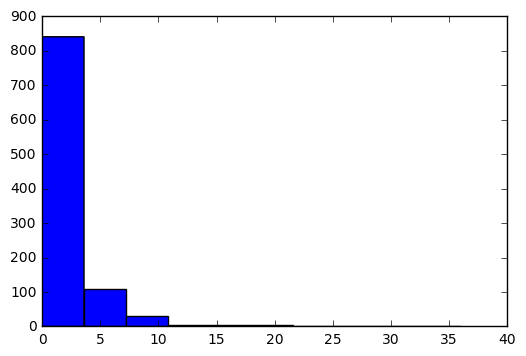

In [358]:
#####################################
#                 9                 #
#####################################

## Adapt the code above to find the mean, standard deviation, minimum, and maximum for
## the number of lessons completed by each student during the first week. Try creating
## one or more functions to re-use the code above.

# Function for generating stats based on a field in grouped data
% pylab inline

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def describe_data(data):
    print 'Mean:', np.mean(data)
    print 'Standard deviation:', np.std(data)
    print 'Minimum:', np.min(data)
    print 'Maximum:', np.max(data)
    plt.hist(data)
    
describe_data(total_lessons_by_account.values())

In [321]:
#####################################
#                 9                 #
#####################################

# TOTAL ANSWER #

engagement_by_account = group_data(paid_engagement_in_first_week, 'account_key')
total_lessons_by_account = sum_grouped_items(engagement_by_account, 'lessons_completed')
describe_data(total_lessons_by_account.values())

Mean: 1.63618090452
Standard deviation: 3.00256129983
Minimum: 0
Maximum: 36


## Number of Visits in First Week

In [322]:
######################################
#                 10                 #
######################################

## Find the mean, standard deviation, minimum, and maximum for the number of
## days each student visits the classroom during the first week.

### SEE ADDED FIELD ABOVE BY paid_engagement dictionary
        
engagement_by_account = group_data(paid_engagement_in_first_week, 'account_key')
total_visits_by_account = sum_grouped_items(engagement_by_account, 'has_visited')
describe_data(total_visits_by_account.values())

Mean: 2.86733668342
Standard deviation: 2.25519800292
Minimum: 0
Maximum: 7


## Splitting out Passing Students

In [323]:
######################################
#                 11                 #
######################################

## Create two lists of engagement data for paid students in the first week.
## The first list should contain data for students who eventually pass the
## subway project, and the second list should contain data for students
## who do not.

subway_project_lesson_keys = ['746169184', '3176718735']

passing_engagement = list()
non_passing_engagement = list()

pass_subway_project = set()

for submission in paid_submissions:
    project = submission['lesson_key']
    rating = submission['assigned_rating']
    if project in subway_project_lesson_keys and rating == 'PASSED':
        pass_subway_project.add(submission['account_key'])
        


In [324]:
######################################
#                 11                 #
######################################

## Create two lists of engagement data for paid students in the first week.
## The first list should contain data for students who eventually pass the
## subway project, and the second list should contain data for students
## who do not.

subway_project_lesson_keys = ['746169184', '3176718735']

passing_engagement = list()
non_passing_engagement = list()

pass_subway_project = set()

for submission in paid_submissions:
    project = submission['lesson_key']
    rating = submission['assigned_rating']
    if project in subway_project_lesson_keys and (rating == 'PASSED' or rating == 'DISTINCTION'):
        pass_subway_project.add(submission['account_key'])

for engagement_record in paid_engagement_in_first_week:
    account_key = engagement_record['account_key']
    if account_key in pass_subway_project:
        passing_engagement.append(engagement_record)
    else:
        non_passing_engagement.append(engagement_record)
    

print len(passing_engagement)
print len(non_passing_engagement)

4527
2392


## Comparing the Two Student Groups

In [352]:
######################################
#                 12                 #
######################################

## Compute some metrics you're interested in and see how they differ for
## students who pass the subway project vs. students who don't. A good
## starting point would be the metrics we looked at earlier (minutes spent
## in the classroom, lessons completed, and days visited).

passing_engagement_account_group = group_data(passing_engagement, 'account_key')
non_passing_engagement_account_group = group_data(non_passing_engagement, 'account_key')

#Comparing Minutes
passing_engagement_total_minutes = sum_grouped_items(passing_engagement_account_group, 'total_minutes_visited')
non_passing_engagement_total_minutes = sum_grouped_items(non_passing_engagement_account_group, 'total_minutes_visited')

#Comparing lessons
passing_engagement_total_lessons = sum_grouped_items(passing_engagement_account_group, 'lessons_completed')
non_passing_engagement_total_lessons = sum_grouped_items(non_passing_engagement_account_group, 'lessons_completed')

#Comparing Days Visited
passing_engagement_total_visits = sum_grouped_items(passing_engagement_account_group, 'has_visited')
non_passing_engagement_total_visits = sum_grouped_items(non_passing_engagement_account_group, 'has_visited')

#describe_data(passing_engagement_total_minutes.values())
#describe_data(non_passing_engagement_total_minutes.values())

describe_data(passing_engagement_total_visits.values())
describe_data(non_passing_engagement_total_visits.values())

Mean: 3.38485316847
Standard deviation: 2.25882147092
Minimum: 0
Maximum: 7
Mean: 1.90517241379
Standard deviation: 1.90573144136
Minimum: 0
Maximum: 7


In [357]:
######################################
#                 12                 #
######################################

## Compute some metrics you're interested in and see how they differ for
## students who pass the subway project vs. students who don't. A good
## starting point would be the metrics we looked at earlier (minutes spent
## in the classroom, lessons completed, and days visited).

# COMPARING LENGTH OF PROJECTS IN DAYS

import datetime as dt

subway_project_lesson_keys = ['746169184', '3176718735']

pass_subway_project_sub_data = list()
non_pass_subway_project_sub_data = list()

pass_subway_project_length = list()
non_pass_subway_project_length = list()

for submission in paid_submissions:
    project = submission['lesson_key']
    rating = submission['assigned_rating']
    if project in subway_project_lesson_keys and (rating == 'PASSED' or rating == 'DISTINCTION'):
        pass_subway_project_sub_data.append(submission)
    else:
        non_pass_subway_project_sub_data.append(submission)
        
for project in pass_subway_project_sub_data:
    start_date = project['creation_date']
    end_date = project['completion_date']
    project_length = int((end_date - start_date).days)
    pass_subway_project_length.append(project_length)
    
for project in non_pass_subway_project_sub_data:
    start_date = project['creation_date']
    end_date = project['completion_date']
    if end_date != None:
        project_length = int((end_date - start_date).days)
        non_pass_subway_project_length.append(project_length)
    
describe_data(pass_subway_project_length)
describe_data(non_pass_subway_project_length)        

Mean: 4.71472392638
Standard deviation: 5.48267469911
Minimum: 0
Maximum: 21
Mean: 3.29121621622
Standard deviation: 5.32278921312
Minimum: 0
Maximum: 124


## Making Histograms

(array([ 3.,  0.,  0.,  2.,  0.,  0.,  2.,  0.,  0.,  1.]),
 array([ 1. ,  1.3,  1.6,  1.9,  2.2,  2.5,  2.8,  3.1,  3.4,  3.7,  4. ]),
 <a list of 10 Patch objects>)

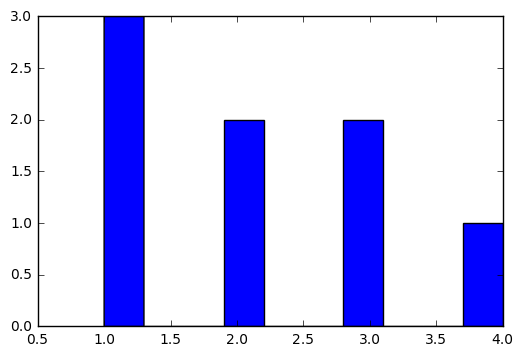

In [350]:
#HISTORGRAM EXAMPLE

data = [1, 2, 1, 3, 3, 1, 4, 2]

%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(data, label = 'EXAMPLE HISTOGRAM')

In [ ]:
######################################
#                 13                 #
######################################

## Make histograms of the three metrics we looked at earlier for both
## students who passed the subway project and students who didn't. You
## might also want to make histograms of any other metrics you examined.



PASSED - Total Minutes Visited: Blue
NON-PASS - Total Minutes Visited: Green


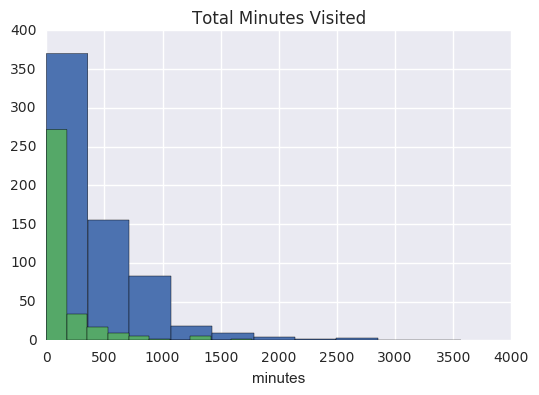

In [372]:
# TOTAL MINUTES HISTOGRAM
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

print 'PASSED - Total Minutes Visited: Blue'
plt.hist(passing_engagement_total_minutes.values())

print 'NON-PASS - Total Minutes Visited: Green'
plt.hist(non_passing_engagement_total_minutes.values())

plt.title('Total Minutes Visited')
plt.xlabel('minutes')


PASSED - Total Lessons: Blue
NON-PASS - Total Lessons: Green


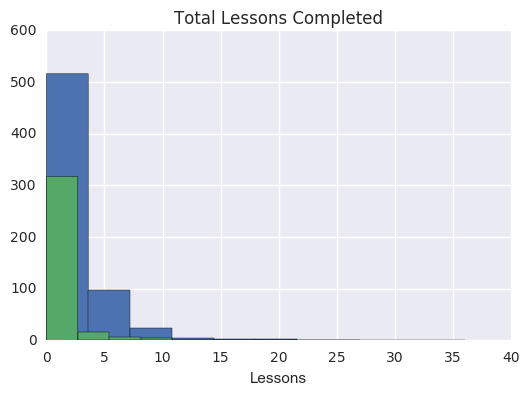

In [373]:
# TOTAL LESSONS HISTOGRAM
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

print 'PASSED - Total Lessons: Blue'
plt.hist(passing_engagement_total_lessons.values())

print 'NON-PASS - Total Lessons: Green'
plt.hist(non_passing_engagement_total_lessons.values())

plt.title('Total Lessons Completed')
plt.xlabel('Lessons')


PASSED - Total Visits: Blue
NON-PASS - Total Visits: Green


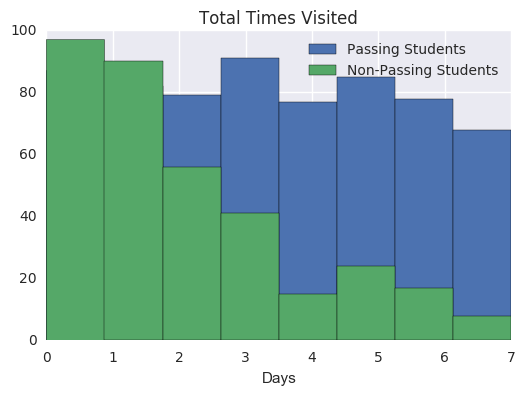

In [385]:
# TOTAL VISITS HISTOGRAM
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

print 'PASSED - Total Visits: Blue'
plt.hist(passing_engagement_total_visits.values(), bins = 8, label = "Passing Students")

print 'NON-PASS - Total Visits: Green'
plt.hist(non_passing_engagement_total_visits.values(), bins = 8, label = 'Non-Passing Students')

plt.title('Total Times Visited')
plt.xlabel('Days')
plt.legend()


PASSED - Total Project Length: Blue
NON-PASS - Total Project Length: Green


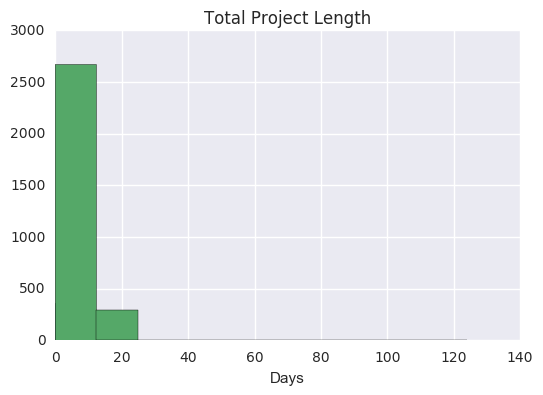

In [375]:
# TOTAL PROJECT LENGTH HISTOGRAM
%matplotlib inline
import matplotlib.pyplot as plt

print 'PASSED - Total Project Length: Blue'
plt.hist(pass_subway_project_length)

print 'NON-PASS - Total Project Length: Green'
plt.hist(non_pass_subway_project_length)

plt.title('Total Project Length')
plt.xlabel('Days')

## Improving Plots and Sharing Findings

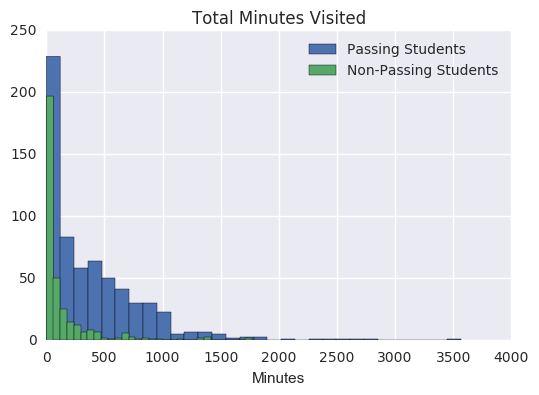

In [383]:
######################################
#                 14                 #
######################################

## Make a more polished version of at least one of your visualizations
## from earlier. Try importing the seaborn library to make the visualization
## look better, adding axis labels and a title, and changing one or more
## arguments to the hist() function.

# TOTAL MINUTES HISTOGRAM
%matplotlib inline
import matplotlib.pyplot as plt

pass_plot = plt.hist(passing_engagement_total_minutes.values(), bins = 30, label = 'Passing Students')

non_pass_plot = plt.hist(non_passing_engagement_total_minutes.values(), bins = 30, label = 'Non-Passing Students')

plt.title('Total Minutes Visited')
plt.xlabel('Minutes')
plt.legend()